<img src="images/ipsa_logo.png" width="100" align="right">

# Ma422- 2022/2023

# <font color='black'> Introduction to Machine Learning</font>

---

1. [Support Vector Machine with different kernels](#NN)
  
2. [Support Vector Machine with scikit-learn](#logit)


---

The work has to be done in groups of 4 maximum. Each notebook must include student names below:
#### Students: Matthieu Dellavalle, Simon Lhoest, Elias Mezmouz

## <font color='black'>Exercise 1: SVMs with different kernels</font>

---

The objective of this exercise is to introduce and code the SVMs algorithm for classification.

First we will import the packages that we will need throughout the notebook.

In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### SVMs with Linear Kernel

We will begin by with a simple 2D example dataset which can be separated by a linear boundary. Experimenting with these datasets will help you gain an intuition of how SVMs work. 

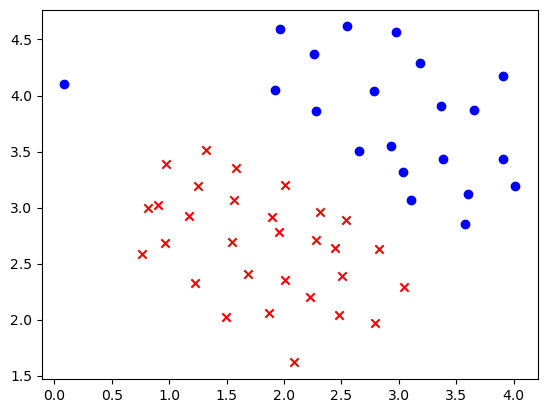

In [2]:
data = loadmat(os.path.join('data', 'ex1data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

Notice that there is an outlier positive example on the far left at about (0:1; 4:1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

The decision function of a support vector machine classifier is obtained through the minimization of the following optimization problem:

$$min_{f} C \sum_{i=1}^n\max(0,1-y_if(x_i))+||f||^2$$ 

where $C$ is a regularization parameter that balances the data fitting (left hand term) and the regularization (right hand term). It plays a role similar to $\frac{1}{\lambda}$ that we were using in the regularization of the logistic regression. 

You will now study the effect of the parameter $C$. 
Firstly, you will train the SVM model with $C = 1$. You should find that the SVM puts the decision boundary in the gap between the two populations missclassifying the data point on the far left.


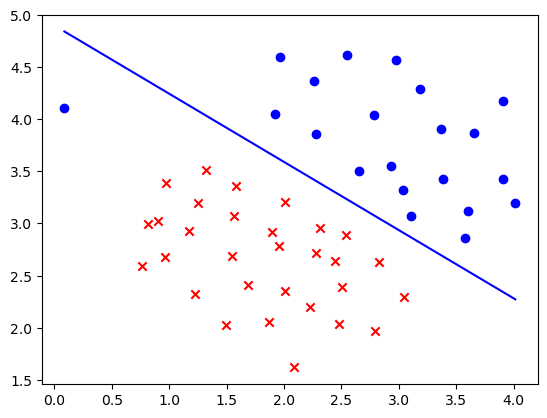

In [3]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

You can try now different values of $C$ and run the SVM training again. Explain what do you obtain. 

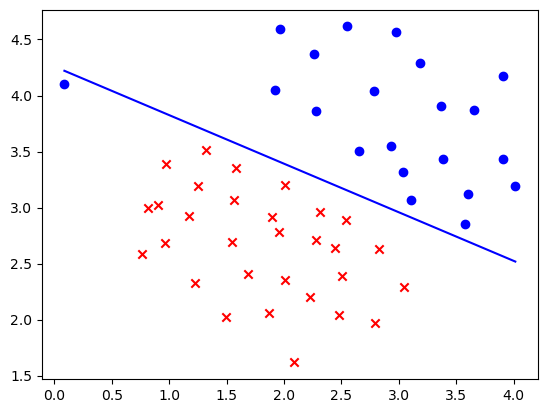

In [4]:
# ====================== YOUR CODE HERE =======================
   
C = 20

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

# CONCLUSION:
# At this point we can see that the C parameter is something 
# similar to an indication of precision: in fact, a higher 
# value of C leads to a more reliable subdivision of the 
# classes, but also implies a bigger computing time. But it's
# not only a matter of dimentions: as an example, we can see 
# that with the value of 50, the line is less precise than the
# one that we would draw with the value of 30, since it gets 
# closer to the highest available cross, and making a less 
# precise subdivision. Ultimately, for this example, the
# smallest and most precise choice of C that we can find is 18.
# We can call C by the name that we've been presented in the 
# course: the regularization parameter.
    
# =============================================================

### SVMs with Gaussian Kernel

In this part of the exercise, you will moove for non-linear classification. In particular, SVMs with Gaussian kernels will be exploited on datasets that are not linearly separable.

#### Gaussian Kernel

In order to obtain non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. We define the Gaussian kernel as a similarity function between a pair of examples,
($x^{(i)}$, $x^{(j)}$):

$$K_{Gaussian}(x^{(i)},x^{(j)})=\exp(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2})=exp{(-\frac{\sum_k^n(x_k^{(i)}-x_k^{(j)})^2}{2\sigma^2})} $$

The Gaussian kernel is parameterized by $\sigma$, which determines how fast the similarity metric decreases as the examples are further apart.

In the next cell, complete the code in `gaussianKernel`.

In [5]:
#EDIT THIS CELL
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================
    
    sim = np.exp(-sum((x1 - x2) ** 2) / (2 * sigma ** 2))    

    # ============================================================
    return sim

Once you have completed the function `gaussianKernel`, the following cell will test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [6]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



### Example 1:
Consider now the following dataset. 

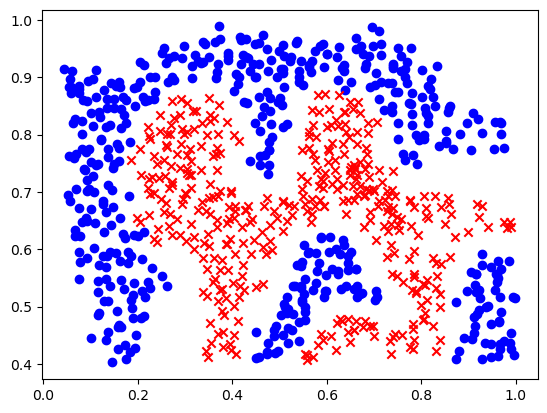

In [7]:
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex1data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

You can notice that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If you have correctly implemented the Gaussian kernel function, the following cell will proceed to train the SVM with the Gaussian kernel on this dataset.

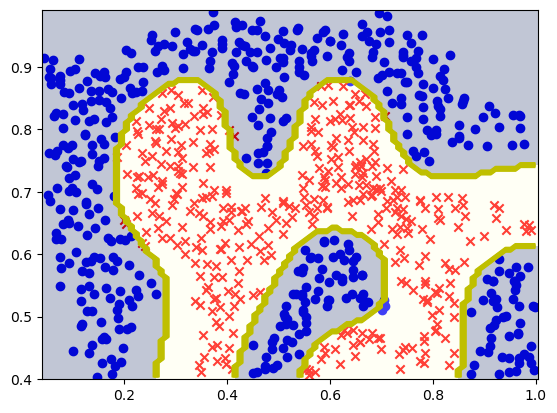

In [9]:
# SVM Parameters
C = 1
sigma = 0.1

model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

### Example 2:
To gain more practical skills on how to use a SVM with a Gaussian kernel, The code below will load and display a new dataset.

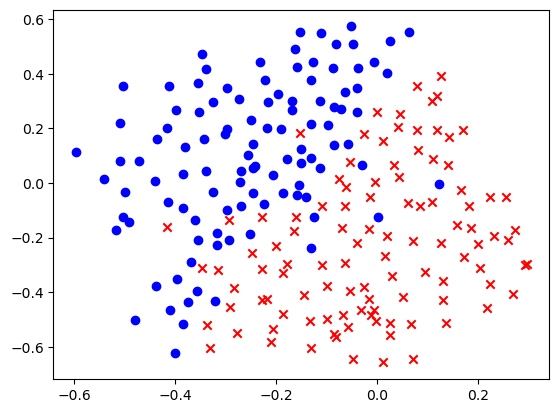

In [10]:
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex1data3.mat'))
X, y, Xval,yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]
# Plot training data
utils.plotData(X, y)

In the provided dataset, you are given the variables X, y, Xval, yval. Your task is to use the cross validation set Xval, yval to determine the best $C$ and parameter $\sigma$ to use. 
For both $C$ and $\sigma$ we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for  $C$ and $\sigma$. 

For example, if you try each of the 8 values listed above for $C$ and for $\sigma$ , you would end up training and evaluating (on the cross validation set) a total of  $8^2=64$ different models. After you have determined the best $C$ and $\sigma$ parameters to use, you should modify the code in `BestParams`, filling in the best parameters.

Implementation tip: When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. In python, you can compute this error using np.mean(predictions != yval) * 100), where predictions is a vector containing all the predictions from the SVM, and yval are the true labels from the cross validation set. You can use the svmPredict function to generate the predictions for the cross validation set.

In [11]:
def BestParams(X, y, Xval, yval):
    #BestPARAMS returns your choice of C and sigma for this part of the exercise
    #where you select the optimal (C, sigma) learning parameters to use for SVM with RBF kernel
    #You should complete this function to return the optimal C and sigma based on a cross-validation set.


   #You need to return the following variables correctly.
    C = 1;
    sigma = 0.3;
    # ====================== YOUR CODE HERE ======================
   
    # since we are asked to try these values, we create a test array
    test = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    # C and sigma will be stored in an array and the error will be initialized (but not to zero, because we want to minimize it)
    Csigma = [0, 0]
    errort = 100
    
    # Then we practice the iteration
    for C in test:
        for sigma in test:
            
            # First we want to train our model with a smaller and simplier dataset: X and y
            model = utils.svmTrain(X, y, C, gaussianKernel, args = (sigma,))
            
            # Then we want to use the trained model to predict the Xval dataset, and finally verify the errors we've made
            predictions = utils.svmPredict(model, Xval)
            error = np.mean(predictions != yval) * 100
            
            # Since the objective is finding the best possible C and sigma, if an improvement is made we store their values
            if error < errort:
                Csigma = [C, sigma]
                errort = error # our objective is to find the smallest possible error
                
    # Ultimately we can store the values in the asked variables
    C = Csigma[0]
    sigma = Csigma[1]
    
    # NOTE: this program won't work if the initial error is higher than 100: 
    # in that case, we must choose different initial test values.

    # =============================================================
    return C, sigma

In [ ]:
C, sigma = BestParams(X, y, Xval, yval);

In [ ]:
model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

## <font color='black'>Exercise 2: SVMs with scikit-learn</font>

---

The Digits dataset is a collection of images of handwritten digits (we have already used it in a previous lab). They can be loaded directly from scikit-learn.

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

Use the Digits data to build a LinearSVC classifier and evaluate it. If the training time is too long, select a smaller part of the training base (for example 10000 samples). For what value of C do we obtain the best generalization results? Conclude. 

In [44]:
# ====================== YOUR CODE HERE ======================
from sklearn import svm
from sklearn.model_selection import GridSearchCV

rand_indices = np.random.choice(X.shape[0], 100, replace=False)
X_train = X[rand_indices, :]
y_train = y[rand_indices]

param_grid = {'C': [0.1, 1, 10, 100]}

svm_model = GridSearchCV(svm.SVC(), param_grid, cv=5)
svm_model.fit(X_train, y_train)

prediction = svm_model.predict(X)

accuracy = svm_model.score(X, y) * 100
num_errors = sum(prediction != y)
print("La précision finale avec", X_train.shape[0], "exemples de formation est", accuracy, "% avec", num_errors, "erreurs.")
# ============================================================

La précision finale avec 100 exemples de formation est 91.70840289371174 % avec 149 erreurs.
